In [29]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt

import csv
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import operator


# 1. HANDLE DATA

In [30]:
with open('iris.data.txt', 'r') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines :
        print (', '.join(row))
        
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        print(lines)
        dataset = list(lines)
        print(len(dataset))
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])
   

trainingSet=[]
testSet=[]
loadDataset('iris.data.txt', 0.66, trainingSet, testSet)
print ('Train: ' + repr(len(trainingSet)))
print ('Test: ' + repr(len(testSet)) )


5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

# 2.SIMILARITY

In [31]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

# test function 
data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distance = euclideanDistance(data1, data2, 3)
print ('Distance: ' + repr(distance))


Distance: 3.4641016151377544


# 3.NEIGHBORS

In [32]:
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1)) #operator is a built-in module providing a set of convenient operators. 
    #In two words operator.itemgetter(n) constructs a callable that assumes an iterable object (e.g. list, tuple, set) 
    # as input, and fetches the n-th element out of it. sorts distance by dist non trainingSet[x]
    print(distances)
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0]) 
    return neighbors

# test functions 

trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1
neighbors = getNeighbors(trainSet, testInstance, 1)
print(neighbors)


[([4, 4, 4, 'b'], 1.4142135623730951), ([2, 2, 2, 'a'], 4.242640687119285)]
[[4, 4, 4, 'b']]


# 4.RESPONSE

In [33]:
def getResponse(neighbors):
    # Creating a list with all the possible neighbors
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = getNeighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction
 
# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()
    for row in test:
        output = predict_classification(train, row, num_neighbors)
        predictions.append(output)
    return(predictions)

# 5.ACCURACY

In [34]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

# test function 
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)


66.66666666666666


# 6.MAIN()

In [35]:
def main():
    trainingSet=[]
    testSet=[]
    split = 0.67
    loadDataset('iris.data.txt', split, trainingSet, testSet)
    print ('Train set: ' + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))    
    predictions=[]
    k = 3
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        prediction=predict_classification(trainingSet, testSet[x], k)
    predictions=k_nearest_neighbors(trainingSet, testSet, k)
    Accuracy=getAccuracy(testSet, predictions)
    print ("Accuracy: " , Accuracy)
main()
    

150
Train set: 109
Test set: 40
[([4.8, 3.0, 1.4, 0.3, 'Iris-setosa'], 0.14142135623730986), ([4.8, 3.0, 1.4, 0.1, 'Iris-setosa'], 0.1414213562373099), ([4.9, 3.1, 1.5, 0.1, 'Iris-setosa'], 0.17320508075688784), ([4.8, 3.1, 1.6, 0.2, 'Iris-setosa'], 0.24494897427831822), ([5.0, 3.2, 1.2, 0.2, 'Iris-setosa'], 0.3), ([4.6, 3.1, 1.5, 0.2, 'Iris-setosa'], 0.3316624790355407), ([4.7, 3.2, 1.6, 0.2, 'Iris-setosa'], 0.3464101615137758), ([4.6, 3.2, 1.4, 0.2, 'Iris-setosa'], 0.3605551275463996), ([5.0, 3.4, 1.5, 0.2, 'Iris-setosa'], 0.42426406871192834), ([5.1, 3.4, 1.5, 0.2, 'Iris-setosa'], 0.4582575694955836), ([5.2, 3.4, 1.4, 0.2, 'Iris-setosa'], 0.49999999999999983), ([5.0, 3.4, 1.6, 0.4, 'Iris-setosa'], 0.4999999999999999), ([4.4, 3.0, 1.3, 0.2, 'Iris-setosa'], 0.5099019513592784), ([4.6, 3.4, 1.4, 0.3, 'Iris-setosa'], 0.5099019513592788), ([5.1, 3.5, 1.4, 0.2, 'Iris-setosa'], 0.5385164807134502), ([5.1, 3.5, 1.4, 0.3, 'Iris-setosa'], 0.5477225575051659), ([4.4, 3.2, 1.3, 0.2, 'Iris-setos

[([5.3, 3.7, 1.5, 0.2, 'Iris-setosa'], 0.10000000000000053), ([5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], 0.2828427124746193), ([5.5, 3.5, 1.3, 0.2, 'Iris-setosa'], 0.3), ([5.1, 3.8, 1.5, 0.3, 'Iris-setosa'], 0.3316624790355405), ([5.1, 3.8, 1.6, 0.2, 'Iris-setosa'], 0.3316624790355405), ([5.4, 3.9, 1.7, 0.4, 'Iris-setosa'], 0.3464101615137753), ([5.4, 3.9, 1.3, 0.4, 'Iris-setosa'], 0.3464101615137753), ([5.4, 3.4, 1.7, 0.2, 'Iris-setosa'], 0.3605551275463991), ([5.4, 3.4, 1.5, 0.4, 'Iris-setosa'], 0.3605551275463992), ([5.1, 3.7, 1.5, 0.4, 'Iris-setosa'], 0.36055512754639957), ([5.2, 3.4, 1.4, 0.2, 'Iris-setosa'], 0.37416573867739444), ([5.1, 3.5, 1.4, 0.2, 'Iris-setosa'], 0.37416573867739483), ([5.7, 3.8, 1.7, 0.3, 'Iris-setosa'], 0.3872983346207414), ([5.1, 3.5, 1.4, 0.3, 'Iris-setosa'], 0.38729833462074237), ([5.0, 3.6, 1.4, 0.2, 'Iris-setosa'], 0.42426406871192884), ([5.1, 3.4, 1.5, 0.2, 'Iris-setosa'], 0.42426406871192923), ([5.2, 4.1, 1.5, 0.1, 'Iris-setosa'], 0.4582575694955836), ([5.

best obtained accuracy =96.07
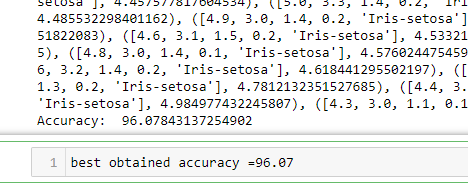

# 7. Another distance metric - Manhattan


In [36]:
def manhattanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += abs((instance1[x] - instance2[x]))
    return distance

# test function 
data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distance = manhattanDistance(data1, data2, 3)
print ('Distance: ' + repr(distance))


Distance: 6


In [37]:
def getNeighbors1(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = manhattanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1)) #operator is a built-in module providing a set of convenient operators. 
    #In two words operator.itemgetter(n) constructs a callable that assumes an iterable object (e.g. list, tuple, set) 
    # as input, and fetches the n-th element out of it. sorts distance by dist non trainingSet[x]
    print(distances)
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0]) 
    return neighbors

def main():
    trainingSet=[]
    testSet=[]
    split = 0.8
    loadDataset('iris.data.txt', split, trainingSet, testSet)
    print ('Train set: ' + repr(len(trainingSet)))
    print ('Test set: ' + repr(len(testSet)))    
    predictions=[]
    k = 3
    for x in range(len(testSet)):
        neighbors = getNeighbors1(trainingSet, testSet[x], k)
        prediction=predict_classification(trainingSet, testSet[x], k)
    predictions=k_nearest_neighbors(trainingSet, testSet, k)
    Accuracy=getAccuracy(testSet, predictions)
    print ("Accuracy: " , Accuracy)
main()

150
Train set: 113
Test set: 36
[([5.1, 3.5, 1.4, 0.3, 'Iris-setosa'], 0.09999999999999998), ([5.0, 3.6, 1.4, 0.2, 'Iris-setosa'], 0.19999999999999973), ([5.1, 3.4, 1.5, 0.2, 'Iris-setosa'], 0.20000000000000018), ([5.2, 3.5, 1.5, 0.2, 'Iris-setosa'], 0.20000000000000062), ([5.2, 3.4, 1.4, 0.2, 'Iris-setosa'], 0.20000000000000062), ([5.0, 3.5, 1.3, 0.3, 'Iris-setosa'], 0.2999999999999995), ([5.0, 3.4, 1.5, 0.2, 'Iris-setosa'], 0.2999999999999998), ([5.0, 3.3, 1.4, 0.2, 'Iris-setosa'], 0.2999999999999998), ([5.1, 3.8, 1.5, 0.3, 'Iris-setosa'], 0.4999999999999999), ([5.5, 3.5, 1.3, 0.2, 'Iris-setosa'], 0.5000000000000002), ([5.3, 3.7, 1.5, 0.2, 'Iris-setosa'], 0.5000000000000004), ([5.0, 3.4, 1.6, 0.4, 'Iris-setosa'], 0.5999999999999999), ([4.8, 3.4, 1.6, 0.2, 'Iris-setosa'], 0.6000000000000001), ([5.4, 3.7, 1.5, 0.2, 'Iris-setosa'], 0.600000000000001), ([4.9, 3.0, 1.4, 0.2, 'Iris-setosa'], 0.6999999999999993), ([5.0, 3.5, 1.6, 0.6, 'Iris-setosa'], 0.6999999999999997), ([4.6, 3.4, 1.4, 0.

[([6.0, 2.7, 5.1, 1.6, 'Iris-versicolor'], 0.5196152422706631), ([6.2, 2.2, 4.5, 1.5, 'Iris-versicolor'], 0.5385164807134505), ([6.3, 2.5, 5.0, 1.9, 'Iris-virginica'], 0.5830951894845299), ([5.7, 2.5, 5.0, 2.0, 'Iris-virginica'], 0.6557438524302), ([6.3, 2.8, 5.1, 1.5, 'Iris-virginica'], 0.6782329983125264), ([5.8, 2.7, 5.1, 1.9, 'Iris-virginica'], 0.6782329983125268), ([6.3, 2.3, 4.4, 1.3, 'Iris-versicolor'], 0.7071067811865471), ([6.2, 2.8, 4.8, 1.8, 'Iris-virginica'], 0.7280109889280517), ([6.1, 2.6, 5.6, 1.4, 'Iris-virginica'], 0.7348469228349531), ([6.1, 2.8, 4.7, 1.2, 'Iris-versicolor'], 0.741619848709566), ([6.1, 2.9, 4.7, 1.4, 'Iris-versicolor'], 0.774596669241483), ([6.4, 2.7, 5.3, 1.9, 'Iris-virginica'], 0.812403840463596), ([6.0, 2.9, 4.5, 1.5, 'Iris-versicolor'], 0.8602325267042624), ([6.1, 3.0, 4.9, 1.8, 'Iris-virginica'], 0.8660254037844384), ([6.5, 2.8, 4.6, 1.5, 'Iris-versicolor'], 0.8774964387392121), ([6.0, 3.0, 4.8, 1.8, 'Iris-virginica'], 0.8774964387392121), ([6.1,

the obtained accuracy in the case of the manhattan distance is :94.44